# Project Unsupervised Learning - AllLife Credit Card Customer Segmentation

**Author: Pablo Ulises Hernandez Garces**

**link Github: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-UlisesHdzG**

**Objective:** 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

**Background:**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

**Key Questions:**

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

**Data Description:**

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 




In [1]:
# Libraries required
import pandas as pd                                             # library for working with dataframes
import numpy as np                                              # library for working with arrays
import matplotlib.pyplot as plt                                 # low level visualization library
%matplotlib inline
import seaborn as sns                                           # higher level visualization library compared to matplotlib

from scipy.stats import zscore
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, cdist


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings('ignore')



# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

data = pd.read_excel('Credit Card Customer Data.xlsx')

## Steps to follow:
1. **Perform univariate analysis** on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [2]:
# Univariate analysis. Checking data types, number of unique values, statistics, missing values and outliers
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


We have 6 variables with 660 observations without null values each. Data has all numeric values (integers). However, it is clear that the range of variables vary among them. I will fixed this later in the process. Aditionally, the variable Sl_No is a identifier variable, so I will drop it because it does not apport information to the analysis.

In [3]:
# I dropped "Sl_No"  debido a que es una columna índice y no una
data.drop("Sl_No",axis=1,inplace=True)
# are there duplicated rows?
print("Number of duplicated rows:")
print(data[data.duplicated()].shape[0])

print("Percentage of duplicated rows:")
print(round(data[data.duplicated()].shape[0]/data.shape[0]*100,2))

# number of unique values in each variable
data.nunique()

Number of duplicated rows:
0
Percentage of duplicated rows:
0.0


Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

From above output we can see that there are not duplicated observations. Also we can see that there are 5 customer keys that are repetead. Let's check them.

In [4]:
# Duplicated Customer key
data[data['Customer Key'].isin(data[data['Customer Key'].duplicated()]['Customer Key'])].sort_values(by="Customer Key",ascending=False)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


From the above output we can see the Customer Keys that are duplicated. However, the observations (rows) are different between them. There are difference between the same customer key among the variables, such as an increment in the Avg credit limite and the total nomber of credit cards, etc. In this sense, I will treat them as unique and different observations. Additionally, the Customer Key variable plays a role as an identifier, so I will drop it from the analysis (also I checked its distribution and it seems uniform).

In [5]:
# I dropped "Sl_No"  debido a que es una columna índice y no una
data.drop("Customer Key",axis=1,inplace=True)

In [6]:
# I will show all unique values of each variable
# unique values
for i in data.columns:
    print(i)
    print(data[i].unique())
    print()

Avg_Credit_Limit
[100000  50000  30000  20000  15000   5000   3000  10000  13000  11000
   9000   6000   8000  19000  16000  18000  17000  14000  12000   7000
  73000  49000  67000  61000  75000  48000  56000  72000  70000  51000
  69000  40000  44000  31000  37000  65000  46000  74000  58000  39000
  52000  33000  47000  71000  41000  59000  64000  45000  54000  66000
  27000  43000  36000  25000  57000  26000  38000  35000  34000  28000
  63000  29000  68000  42000  62000  32000  60000  55000 157000  94000
 163000 131000  96000 136000 121000 158000 108000 166000 176000 178000
  91000 156000 146000  84000 155000 200000 195000 187000 106000 114000
 126000 173000 153000 184000 123000 144000  97000  98000 127000 171000
 186000 183000 111000 112000 132000  95000 172000  99000 145000 167000]

Total_Credit_Cards
[ 2  3  7  5  6  4  1  9  8 10]

Total_visits_bank
[1 0 2 5 3 4]

Total_visits_online
[ 1 10  3 12 11  2  5  4  0 14  7 13 15  6  8  9]

Total_calls_made
[ 0  9  4  3  8  2  1  7  5

At a glance, we can see that there are no "strange" values such as mistakes in the registration of the data or a value that is not logic for some variable.

In [7]:
# Frequency of values
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

Avg_Credit_Limit
8000      35
6000      31
9000      28
13000     28
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

Total_Credit_Cards
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

Total_visits_bank
2    158
1    112
3    100
0    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

Total_visits_online
2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

Total_calls_made
4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: Total_calls_made, dtype: int64



In [8]:
# Skewness
print(data.skew())

#Now let's check basic statistics of the variables.

data.describe().T

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64


,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


From above results we can see that all variables are positively skewed, except "Total_Credit_Cards". There are variables with a high skewness such as "Avg_Credit_Limit" and "Total_visits_online". With moderate skewness we have "Total_calls_made" ande with very few skewness we have "Total_Credit_Cards" and "Total_visits_bank".

In [9]:
# Number of zeros in the distributions
print("Number of zeros per variable and proportion")
for i in data.columns:
    aux=sum(data[i]==0)
    print(i,":",aux,"|",round(100*aux/data.shape[0],2))

Number of zeros per variable and proportion
Avg_Credit_Limit : 0 | 0.0
Total_Credit_Cards : 0 | 0.0
Total_visits_bank : 100 | 15.15
Total_visits_online : 144 | 21.82
Total_calls_made : 97 | 14.7


We can see that the variables related to visits and calls have a considerable amount of zeros (from 14.7% up to 21.82%), but they follow the logic of these variables and describe the dynamic of the clients. 

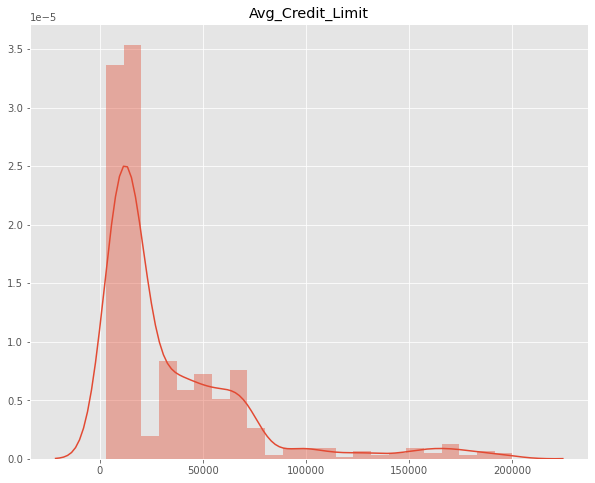

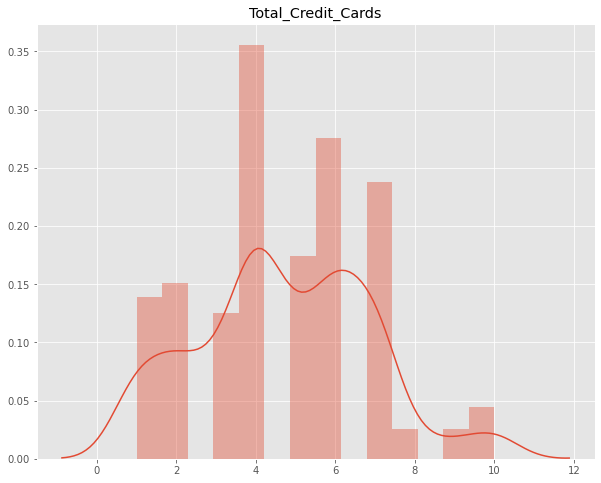

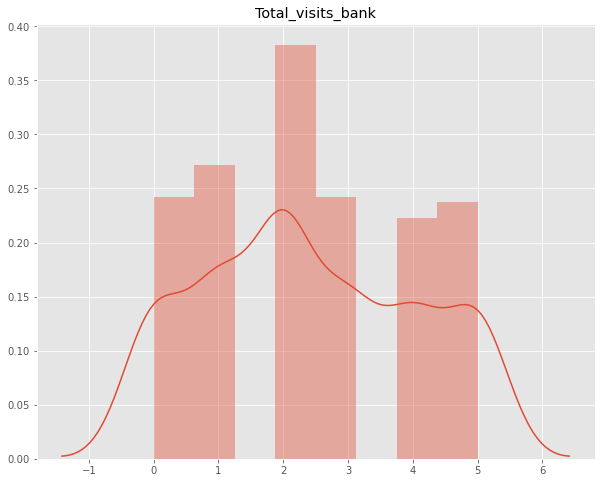

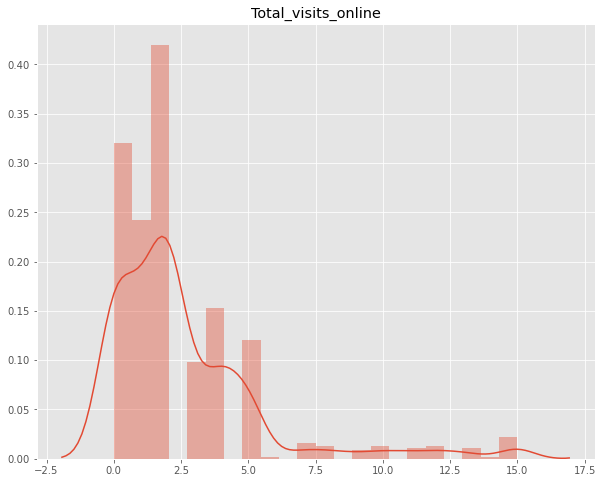

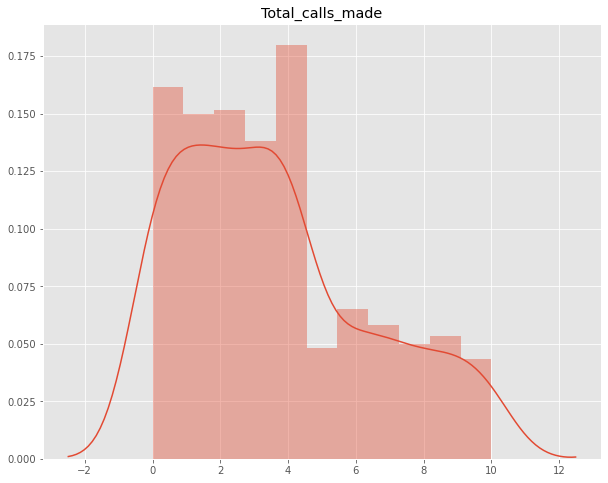

In [10]:
# Univariate plots

# plots for continous variables
for i in data.columns:
    sns.distplot(data[[i]],kde=True)
    plt.title(i)
    plt.show()

With the plots we can see that all distributions are multimodal with at least two modes. These different modes could help in the clustering, as they differentiate groups within each variable.

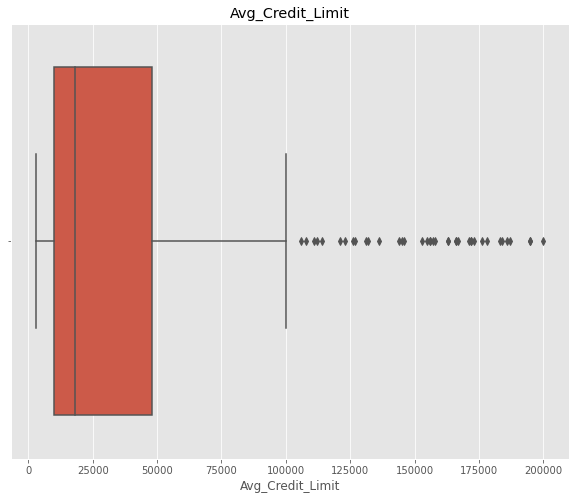

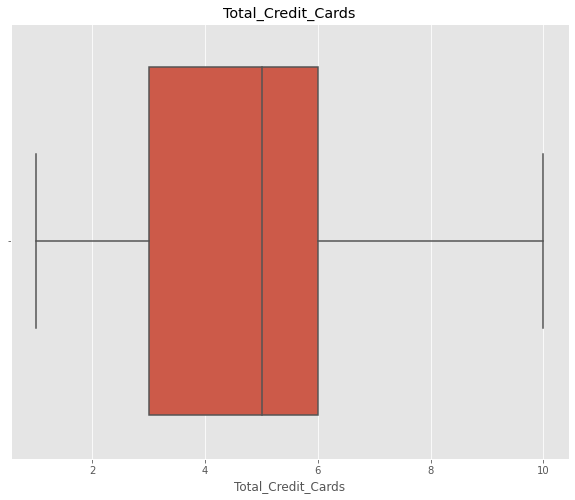

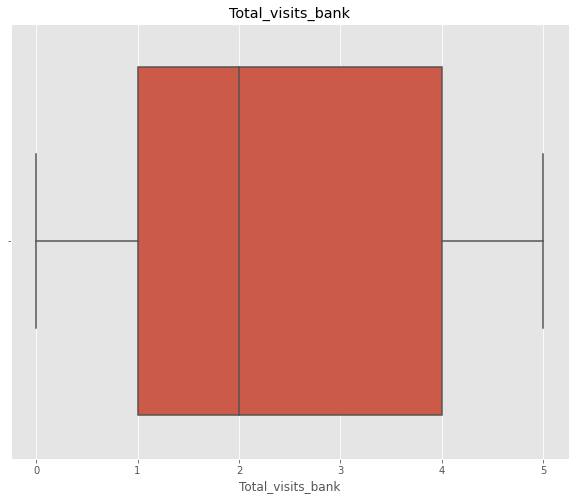

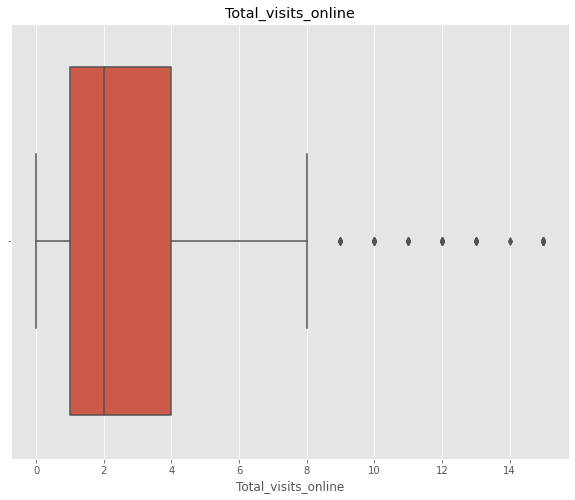

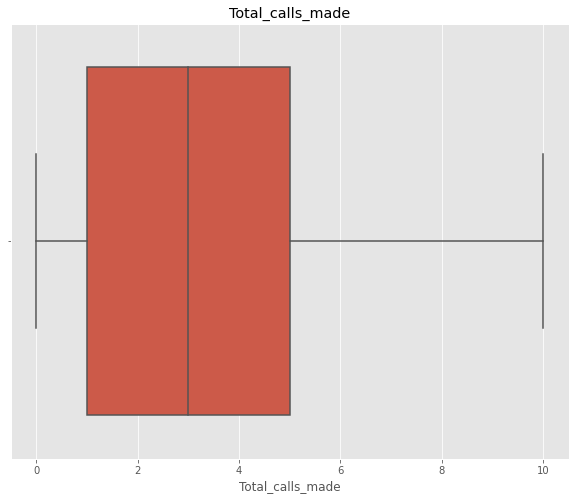

In [11]:
# Finally, we check outliers through boxplots
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

From boxplots we can see that variables "Avg_Credit_Limit" and "Total_visits_online" have outliers. Let's check the percentage they represent.

In [12]:
# proportion of outliers in each variable
print('Number and percentage of outliers per variable\n')
for i in data.columns:
    IQR= np.percentile(data[i],75) - np.percentile(data[i],25)
    t_q = np.percentile(data[i],75)
    # let´s count how many observations exceeds 3Quartile + 1.5*IQR
    res=sum(data[i]>(t_q + 1.5*IQR))
    perc = round(res/data[i].shape[0]*100,2)
    print(i,":",res,'|',perc)


Number and percentage of outliers per variable

Avg_Credit_Limit : 39 | 5.91
Total_Credit_Cards : 0 | 0.0
Total_visits_bank : 0 | 0.0
Total_visits_online : 37 | 5.61
Total_calls_made : 0 | 0.0


There are 5.91% and 5.61% of outliers in variables "Avg_Credit_Limit" and "Total_visits_online", respectively. This could be a problem for clustering depending on the metric used. So, in order to avoid this kind of problems I will replace those extreme values for the value resulting of  $Q_{75\%} + 1.5*IQR$. This imputation may lead to others outliers but I expect that these will be much less. One reason to impute outliers with this threshold is to "mantain" this feature of being at the top of the values in each variable, this may be helpful in combination with the rest of the variables. 

In [13]:
# Imputing outliers for variables "Avg_Credit_Limit" and "Total_visits_online"

# Avg_Credit_Limit
IQR_avg = np.percentile(data['Avg_Credit_Limit'],75) - np.percentile(data['Avg_Credit_Limit'],25)
t_q_avg = np.percentile(data['Avg_Credit_Limit'],75)

data['Avg_Credit_Limit'][data['Avg_Credit_Limit']>t_q_avg + 1.5*IQR_avg] = t_q_avg + 1.5*IQR_avg

# Total_visits_online
IQR_avg = np.percentile(data['Total_visits_online'],75) - np.percentile(data['Total_visits_online'],25)
t_q_avg = np.percentile(data['Total_visits_online'],75)

data['Total_visits_online'][data['Total_visits_online']>t_q_avg + 1.5*IQR_avg] = t_q_avg + 1.5*IQR_avg



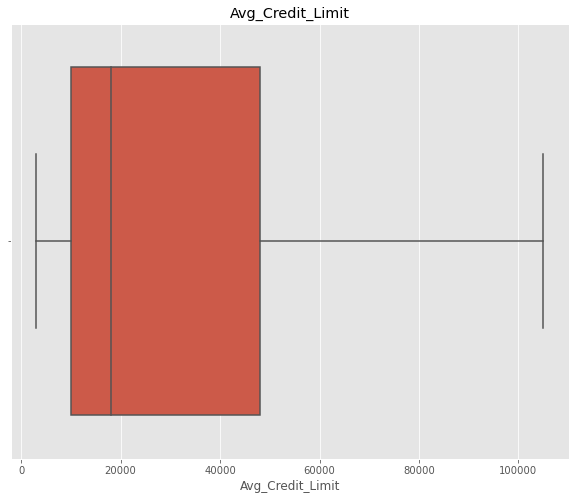

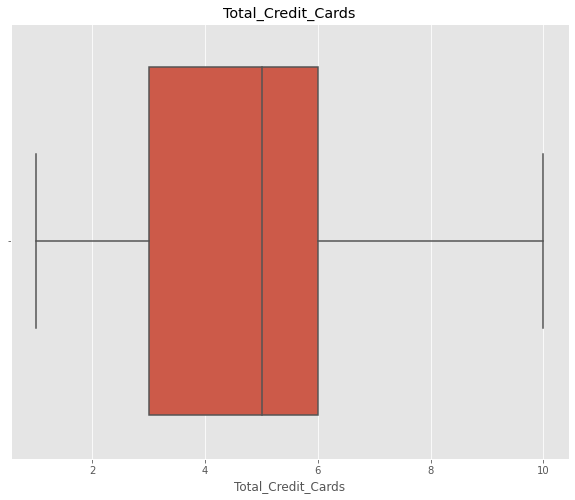

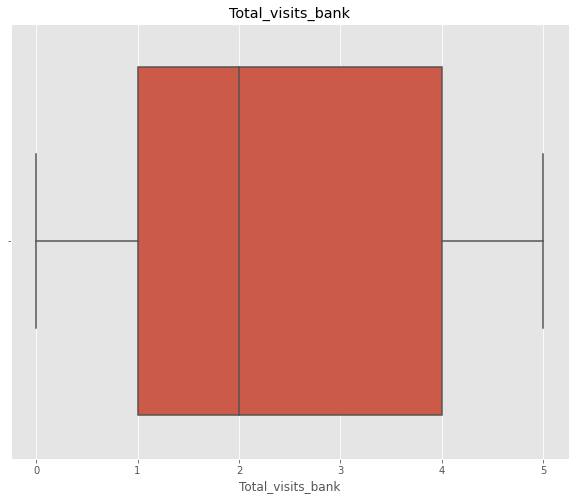

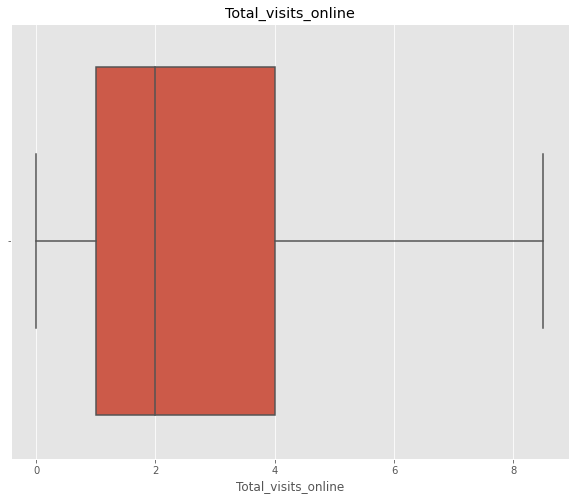

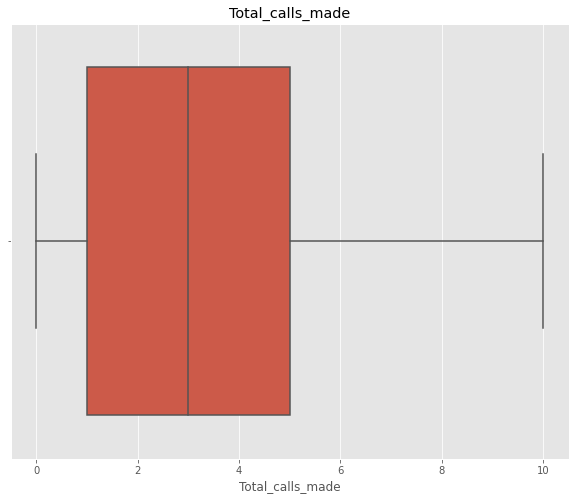

In [14]:
# Finally, Let's check again how boxplots looks like
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In the above boxplots we can see that there are not outliers in any varible. 

**Bivariate Analysis**

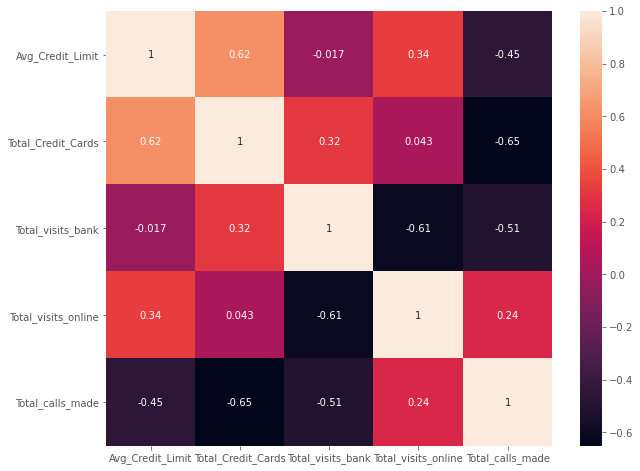

In [15]:
# Correlation between variables
sns.heatmap(data.corr(),annot=True)

From the heatmap we can see that there are variables with high correlation, such as Total_calls with Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank and the latter with total_visits_online. The correlations of these variables are in the range of -.61 to -.41, we can see that these correlations are not so strong and we can keep all variables. Others variables with a high positive correlation are "Total_Credit_Cards" and "Avg_Credit_limit" with 0.62. The rest of the variables have few correlations from -.017 to .34.

All these correlations seem logic. For example, if a customer visits multiple times the bank it would not be necessary to have a call or visiting the website of the bank. Another example with is that if a customer have multiple credit cards it is very likely that this customer has an average credit limit higher than others.

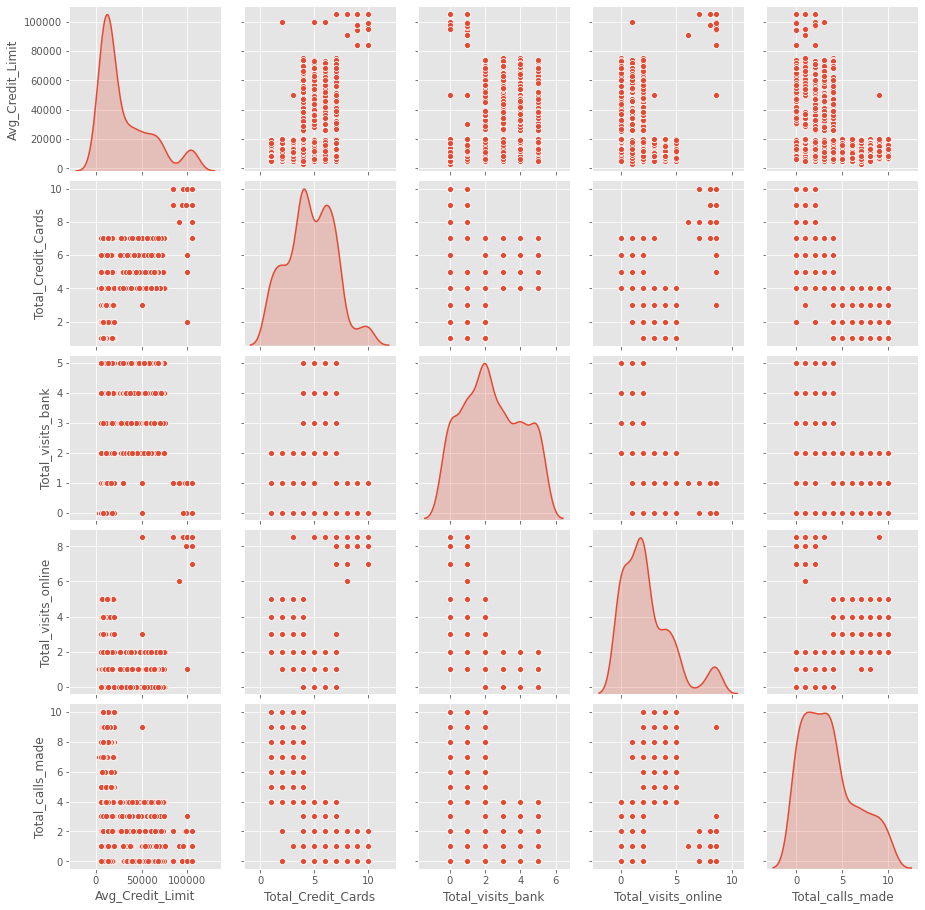

In [16]:
# plotting continuous variables using pairplot
sns.pairplot(data,diag_kind="kde")

From the pairplot we can see the multimodal distributions of the variables and that there are some visible cluster between some variables. At a glance we can see that there are at least two clusters. This clusters are very clear in the graphs of "Total_visits_online" vs "Avg_Credit_Limit" and "Total_Credit_Cards". Another example is "Total_calls_made" vs "Total_visits_online".

**Data processing for implementing clustering**

I will standardize the date in this step

In [17]:
# Final data processing
data_scaled = data.apply(zscore)

**3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)**

I will find the optimal number of clusters through the elbow plot for K-means clustering. I will use the euclidean distances for this purpose.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

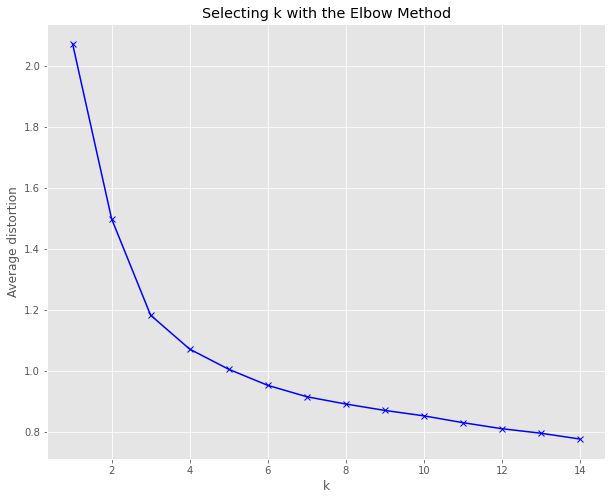

In [18]:
#Finding optimal no. of clusters
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

# Plotting the elbow

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [19]:
print('Decrement in Distortions by incrementing 1 cluster:\n',np.diff(meanDistortions))

Decrement in Distortions by incrementing 1 cluster:
 [-0.57453221 -0.31628426 -0.11122724 -0.0661382  -0.052712   -0.03739257
 -0.02396013 -0.02102102 -0.01772805 -0.02239136 -0.01987858 -0.01479647
 -0.01911179]


From the elbow plot I can say that the optimal number of clusters is between 4-6, after 6 the decrement of distortions is very low. Additionally, if I look at the decrements for passing from k-clusters to k+1 I can say that the decrement for passing from 4 to 5 clusters is not so significant (-0.066), similarly, passing from 5 to 6 clusters does not decrease significantly the distortion (only 0.0529). In this sense, having a more parsimonious model is prefered,  so I will keep 4 clusters for the analysis.

In [20]:
# Look the distributions of each of the 4 clusters using boxplots
kmeans_model=KMeans(4,n_init = 15, random_state=2345)
kmeans_model.fit(data_scaled)
pred_kmeans=kmeans_model.predict(data_scaled)

#Append the prediction 
data["GROUP"] = pred_kmeans
data_scaled["GROUP"] = pred_kmeans
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1.0,0,0
1,50000,3,0,8.5,9,1
2,50000,7,1,3.0,4,0
3,30000,5,1,1.0,4,0
4,100000,6,0,8.5,3,2


Let's look some statistics for each cluster and their boxplots

In [21]:
data_clust = data.groupby(['GROUP'])
data_clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,56036.585366,5.530488,3.182927,0.939024,2.091463
1,12197.309417,2.403587,0.928251,3.553812,6.883408
2,102660.000000,8.740000,0.600000,8.180000,1.080000
3,17295.964126,5.497758,3.708520,1.017937,1.941704


We can see that the mean for "Avg_Credit_Limit" in each cluster is pretty different between them. However, in the rest of variables there are clusters that have means relatively close to another, for example the group 0 and 3 have means very close to each other in all variables, except "Avg_Credit_Limit".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D570D2348>,
      dtype=object)

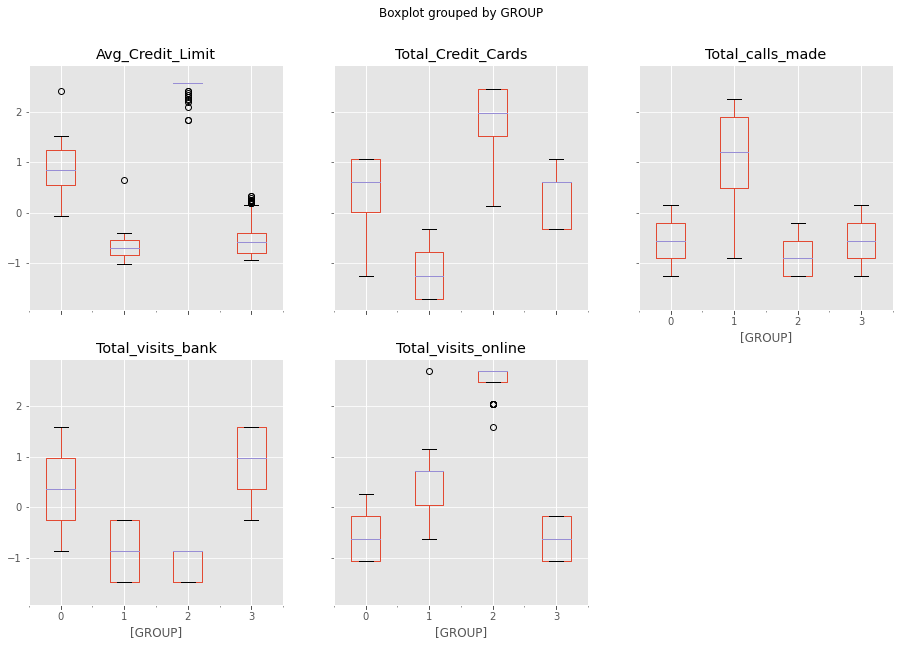

In [22]:
# Boxplots
data_scaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

We can see that the distribution for each cluster per variable are different between them. This is good because the clusters differentiate well the data. From these distributions it is possible to find "types" of clients.

**4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)**

In [23]:
# I remove the GROUP column created in K-means for visualization.
data_scaled.drop('GROUP',axis=1,inplace=True)
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [24]:
#### generate the linkage matrix with different linkages using euclidean metric

linkages = ['single','complete','average','weighted','centroid','median','ward']
Z = []
c = []
coph_dists = []

for i in range(0,7):
    x = linkage(data_scaled, linkages[i], metric='euclidean')
    Z.append(x)
    a, b = cophenet(x , pdist(data_scaled))
    c.append(a)
    coph_dists.append(b)


<Figure size 1800x720 with 0 Axes>

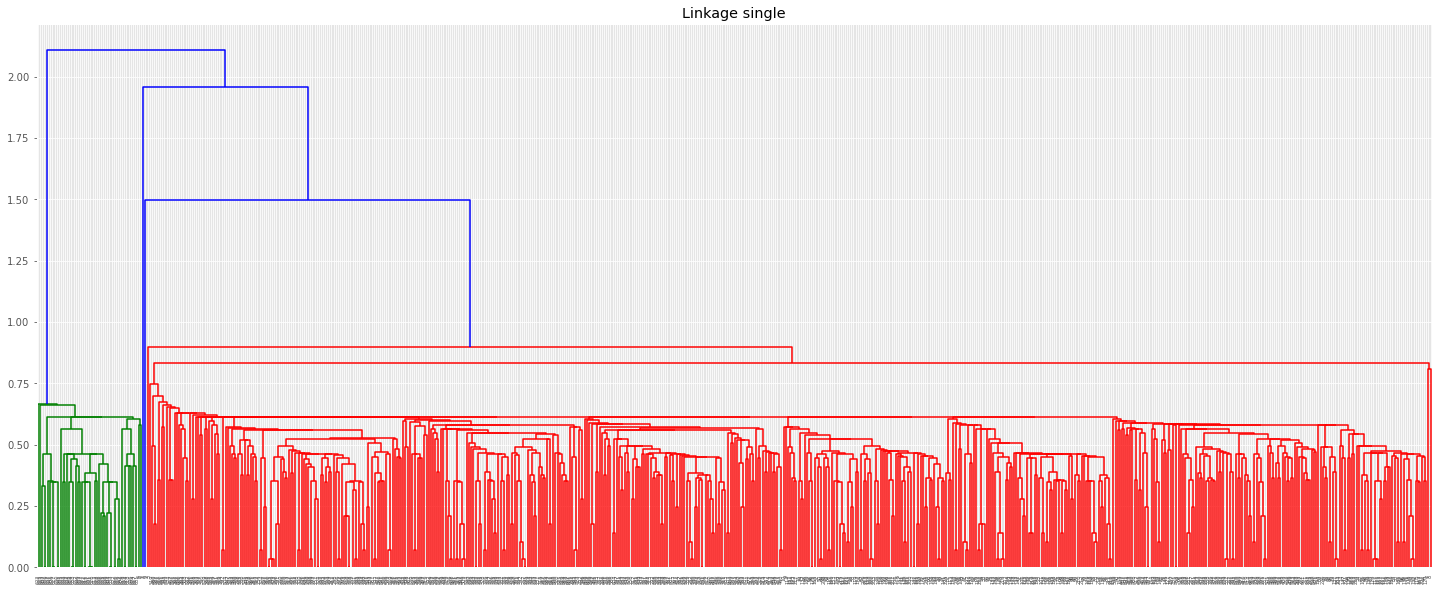

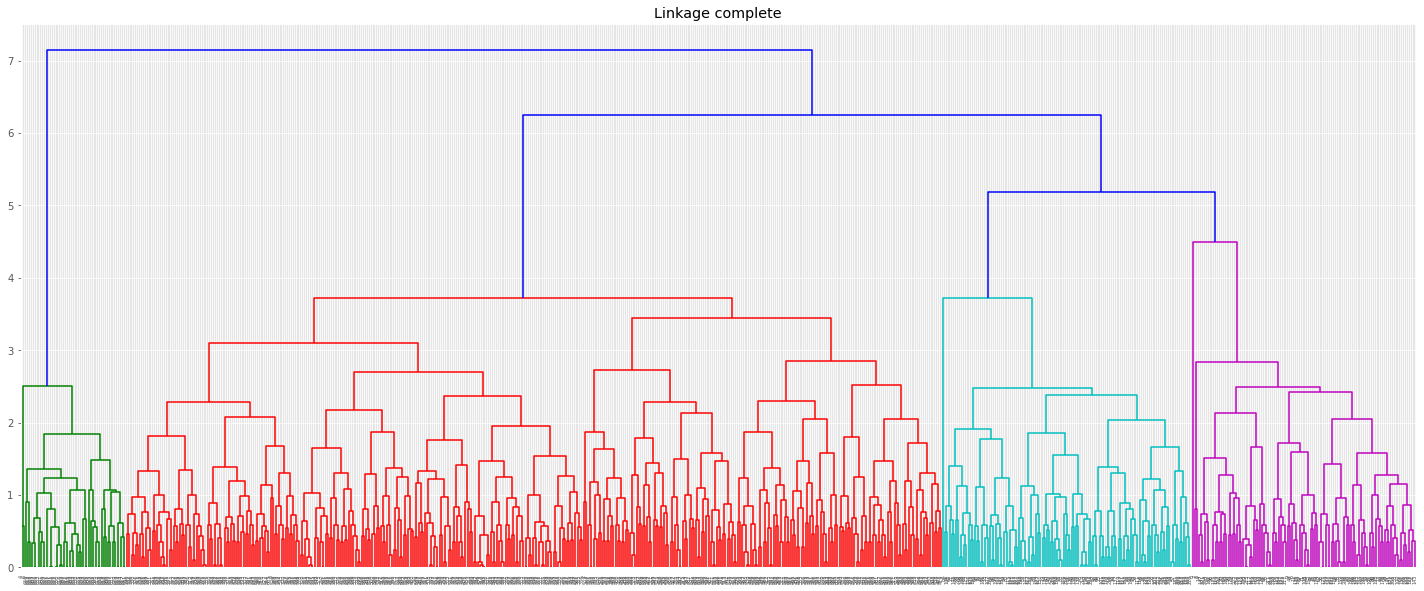

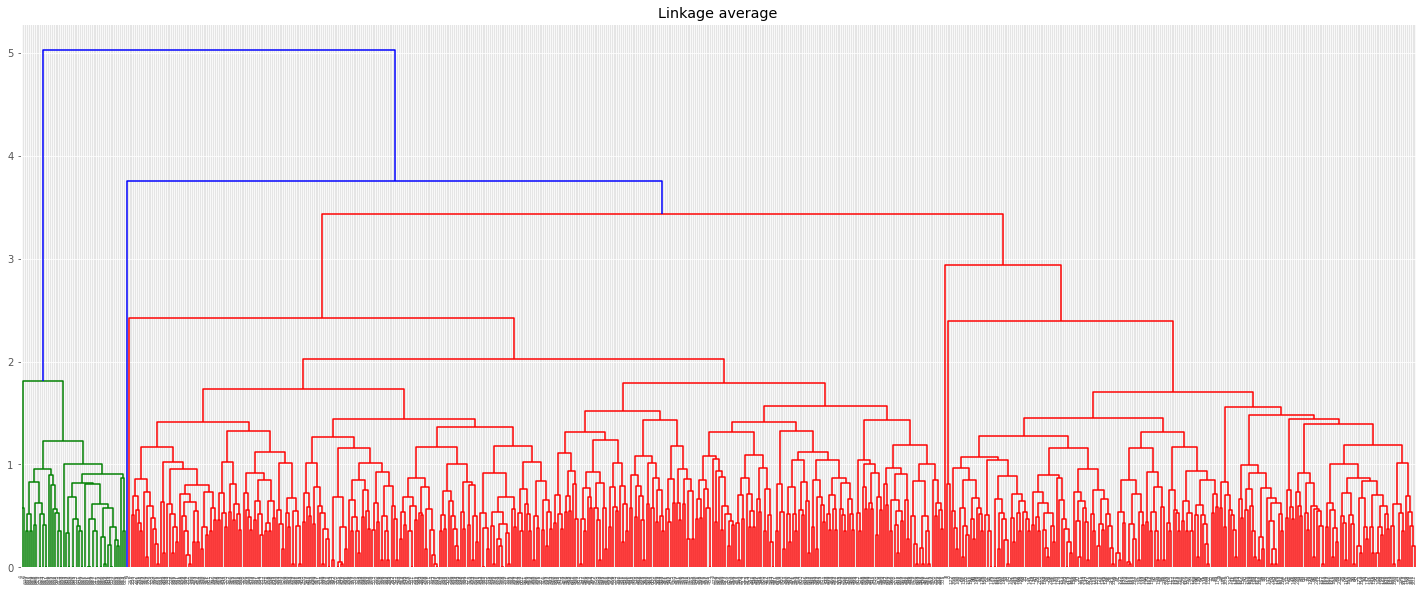

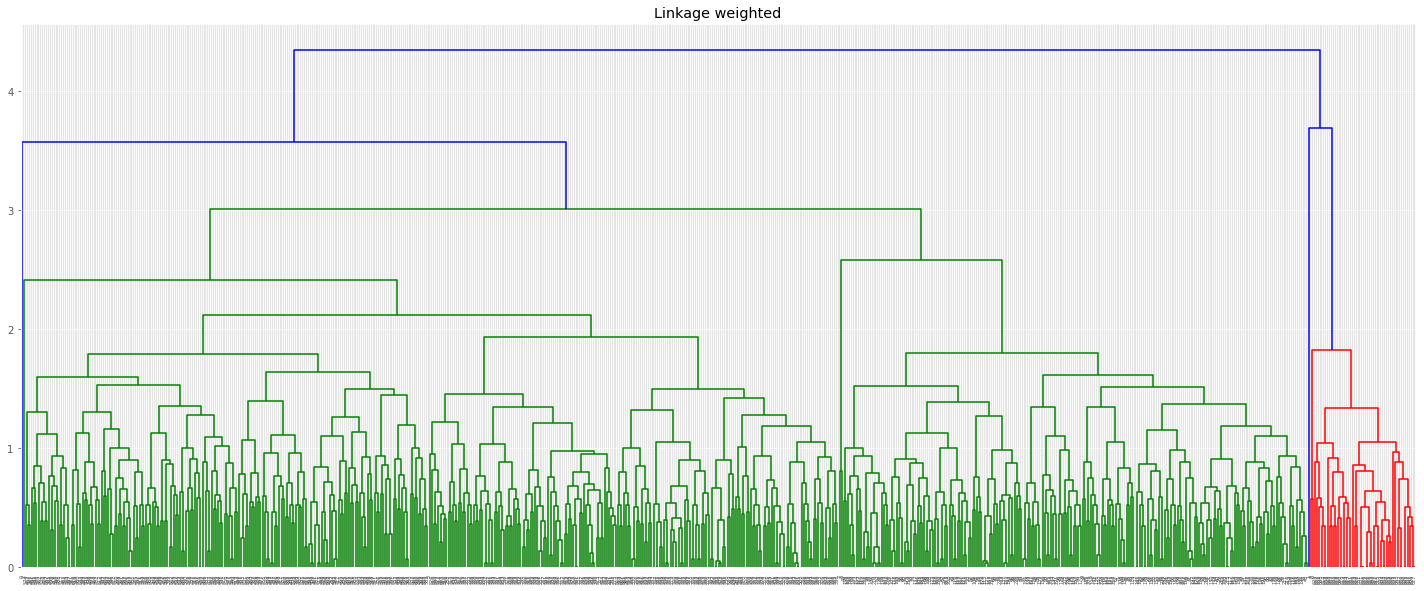

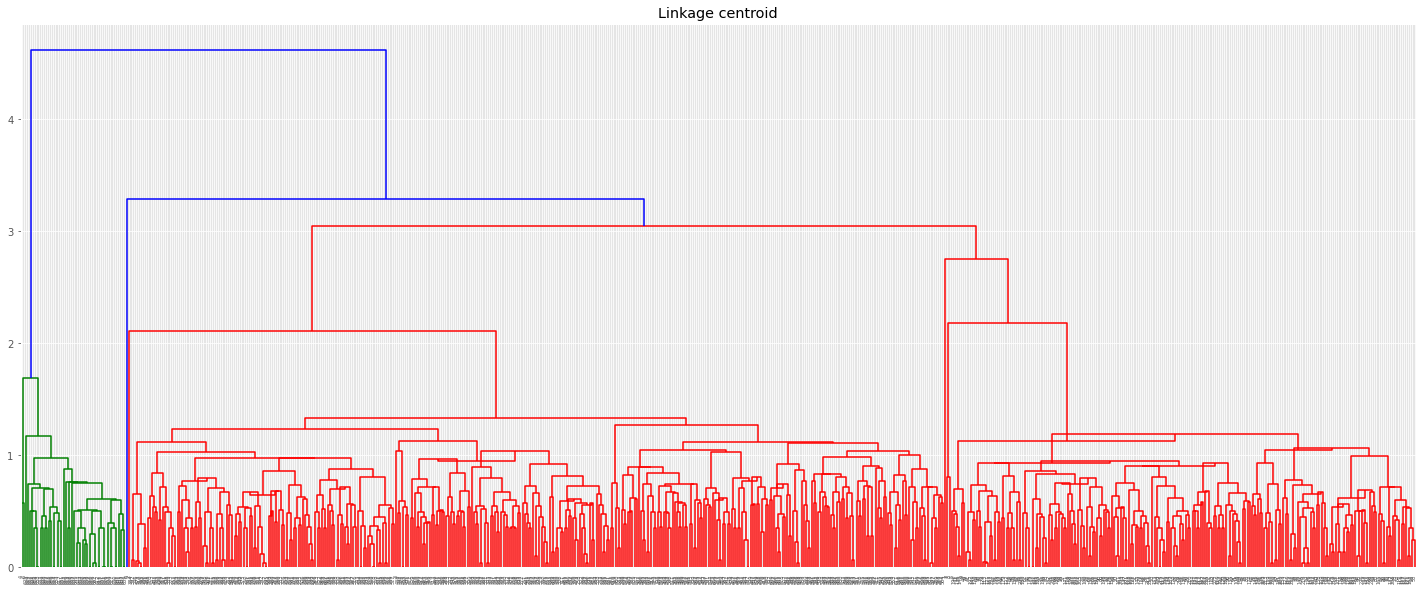

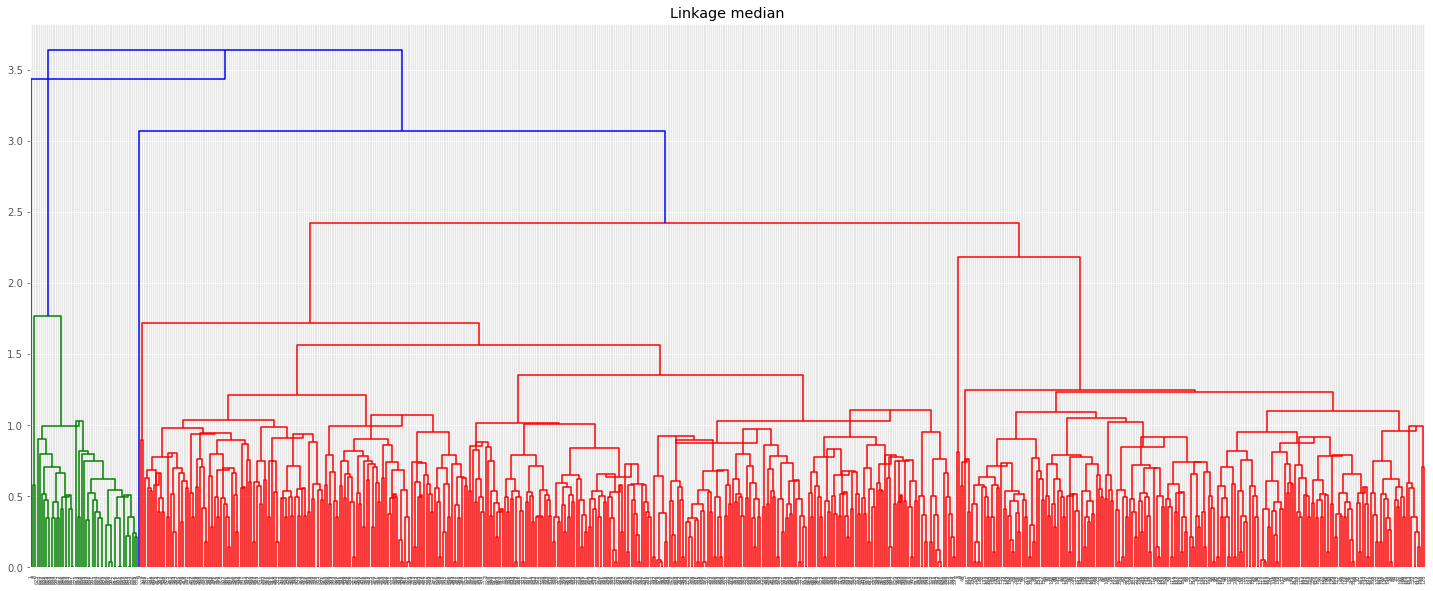

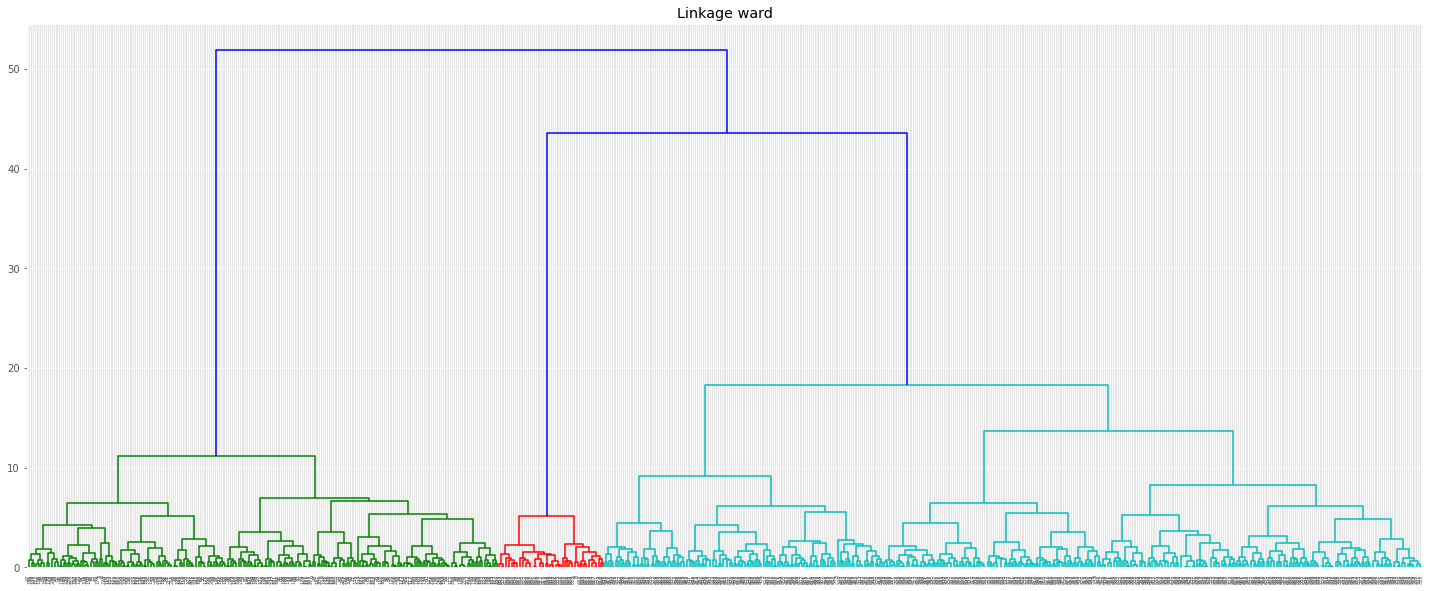

In [25]:
plt.figure(figsize=(25, 10))

for i in range(0,7): # Rows
    plt.figure(figsize=(25, 10))
    dendrogram(Z[i])#,truncate_mode='lastp',p=5)
    plt.title('Linkage ' + linkages[i])
    plt.show()

In [26]:
print("Cophenet coefficient per linkage: ")
pd.DataFrame([c],columns = linkages)

Cophenet coefficient per linkage: 


,single,complete,average,weighted,centroid,median,ward
0,0.666698,0.820788,0.892667,0.887237,0.888063,0.888716,0.770227


Looking at the Cophenet coefficiente from different linkages I can determine that the average linkage is the best of all. So, I will use this one to cluster the data. Additionally, from the dendrogram of this linkage I can see that 4 clusters are well formed. This is because if I go down with the dendrogram distance in order to form more clusters it will be formed one cluster with very few observations that are not so far from other observations. So I will keep 4 clusters.

In [27]:
# Cluster data into 4 clusters
clusters = fcluster(Z[2], 3.0, criterion='distance')
clusters

array([4, 3, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

We can see that there are one cluster with only one observations. This observation is far enough to others to form a cluster or to be joined at the top of the dendrogram. Let's check the distribution of each cluster.

In [28]:
data['Labels'] = clusters
data_scaled['Labels'] = clusters
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,Labels
0,100000,2,1,1.0,0,0,4
1,50000,3,0,8.5,9,1,3
2,50000,7,1,3.0,4,0,2
3,30000,5,1,1.0,4,0,2
4,100000,6,0,8.5,3,2,1


In [29]:
data_clust_h = data.drop('GROUP',axis=1).groupby('Labels')
data_clust_h.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
1,102660.000000,8.740000,0.600000,8.180000,1.080000
2,33541.450777,5.520725,3.492228,0.984456,2.010363
3,12197.309417,2.403587,0.928251,3.553812,6.883408
4,100000.000000,2.000000,1.000000,1.000000,0.000000


In [30]:
data_clust_h.count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
1,50,50,50,50,50
2,386,386,386,386,386
3,223,223,223,223,223
4,1,1,1,1,1


We can see that the means of each cluster are differentiate well. Also, there are some inbalance in the composition of each cluster. There are two clusters with few observations. (50 and 1 observations).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D584DC308>,
      dtype=object)

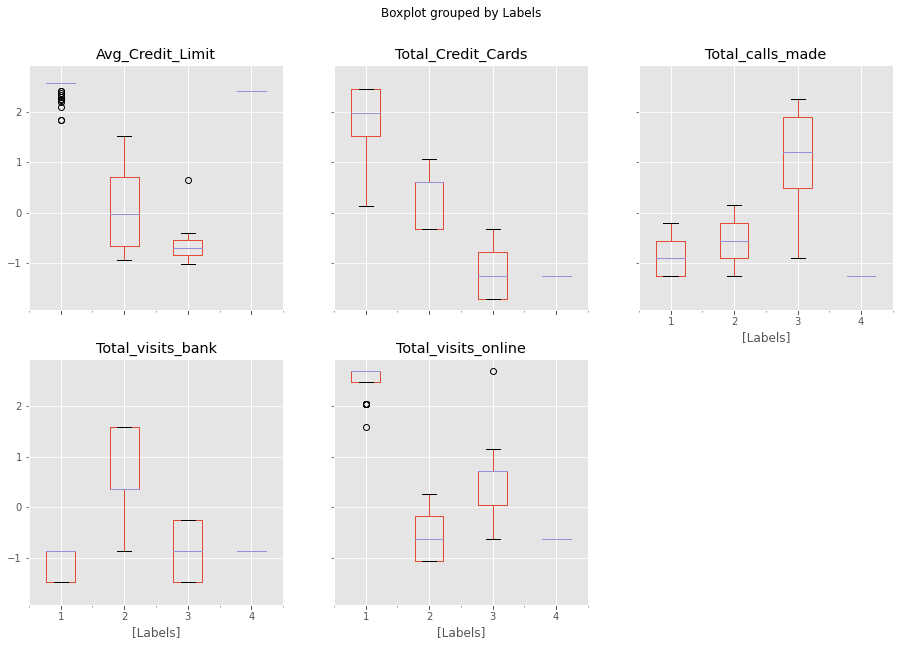

In [31]:
# Boxplots
data_scaled.boxplot(by='Labels', layout = (2,3),figsize=(15,10))

From boxplots, we can see that the distribution of each variable per cluster are well diferentiate in most cases. However, for cluster 4 there is only a clear difference between the other clusters in variables "Avg_Credit_limit" and "Total_Calls_Made".

**5. Calculate average silhouette score for both methods. (5 marks)**

In [32]:
# Calculate Avg Silhoutte Score
data_scaled.drop(['Labels'],axis=1,inplace=True)

In [33]:
# Silhouette score for kmeans
print('K means silhouette score:',
      silhouette_score(data_scaled,pred_kmeans))

# Silhouette score for Hierarchical clustering
print('Hierarchical clustering silhouette score:',silhouette_score(data_scaled,clusters))

K means silhouette score: 0.38147048130671246
Hierarchical clustering silhouette score: 0.4808223272655649


For the silhouette score the closer to 1 the better. So, from above results we can see that hierarchical clustering performs better than K-means clustering.

**6. Compare K-means clusters with Hierarchical clusters. (5 marks)**

In [34]:
# Comparing k-means clusters with Hierarchical clusters
k_means = data.drop(['Labels'],axis=1).groupby(['GROUP'])
h_clust = data.drop(['GROUP'],axis=1).groupby(['Labels'])

In [35]:
k_means.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,56036.585366,5.530488,3.182927,0.939024,2.091463
1,12197.309417,2.403587,0.928251,3.553812,6.883408
2,102660.000000,8.740000,0.600000,8.180000,1.080000
3,17295.964126,5.497758,3.708520,1.017937,1.941704


In [36]:
h_clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
1,102660.000000,8.740000,0.600000,8.180000,1.080000
2,33541.450777,5.520725,3.492228,0.984456,2.010363
3,12197.309417,2.403587,0.928251,3.553812,6.883408
4,100000.000000,2.000000,1.000000,1.000000,0.000000


Comparing the means of each variable in the clusters of both clustering techniques, we can see that cluster 2 from K-means has the same mean that cluster 1 in Hierarchical clustering. Also, cluster 1 from k-means with cluster 3 from Hierarchica. On the other hand, averages of cluster 0 from k-means are close to cluster 2 from Hierarchical. Finally, cluster 3 and cluster 4 from k-means and hierarchical, respectively, are pretty different. This could be explained as in hierarchical clustering the cluster 4 has only one observation.

In [37]:
k_means.std()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12610.196597,1.153409,1.097996,0.855836,1.472921
1,5249.332169,1.098068,0.802171,1.185221,1.985271
2,5161.118373,1.274715,0.494872,0.612456,0.876915
3,9996.951420,1.134529,1.115117,0.859311,1.401804


In [38]:
h_clust.std()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
1,5161.118373,1.274715,0.494872,0.612456,0.876915
2,21952.240769,1.128537,1.131000,0.858732,1.430610
3,5249.332169,1.098068,0.802171,1.185221,1.985271
4,NaN,NaN,NaN,NaN,NaN


In [39]:
print(k_means.Avg_Credit_Limit.count())
print(h_clust.Avg_Credit_Limit.count())

GROUP
0    164
1    223
2     50
3    223
Name: Avg_Credit_Limit, dtype: int64
Labels
1     50
2    386
3    223
4      1
Name: Avg_Credit_Limit, dtype: int64


With these outputs we can verify that clusters 1 and 2 from k-means and 3 and 1 from hierachical have the same mean, standar deviation and cardinality, respectively with its pairs. So, I can conclude that these clusters are identical. For the others they are different since in hierarchical clustering cluster 4 has only one observation.

As a conclusion of this comparison, it is demonstrated that there are two clusters that are well identified in the data, I say this because both algorithms identified them identically, there is no other reason than these clusters are well separated from the others and are "easy" to identify. The rest of the points in the data can be sapareted into different clusters, depending the algorithm we use. So, there is more cohesion between these points and is more difficult to cluster them.

Note: In the hierachical clustering, the cluster with only one observation could not be grouped with other but only at almost the top of the dendrogram, where we would have had only 2 clusters. If we choose 3 cluster, one of them would have only one observation also. This observation could be interpreted as a kind of "outlier" who lives far from almost all.

**7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)**

Finally I would choose k-means algorithm for analyze the clusters and answer the questions. This because both algorithms have 2 clusters identical and the other two are really different, but in the case of k-means there are more interpretability than in hierarchical clustering, this because one cluster in hierarchical has only one observation. However, I will sacrifice aroun 0.1 of the silhouette score of the hierarchical clustering but I will gain more classes of customers.

In [40]:
k_means.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,56036.585366,5.530488,3.182927,0.939024,2.091463
1,12197.309417,2.403587,0.928251,3.553812,6.883408
2,102660.000000,8.740000,0.600000,8.180000,1.080000
3,17295.964126,5.497758,3.708520,1.017937,1.941704


In [41]:
k_means.Avg_Credit_Limit.count()

GROUP
0    164
1    223
2     50
3    223
Name: Avg_Credit_Limit, dtype: int64

Analyzing the clusters formed we can see, in average:

* The group with the highest average credit limit has also the highest total credit cards and that they use a lot more the web page of the bank rather than make a call or visit premises. They have the lowest total visits of bank and calls made. This group is the smallest, there are only 50 people here. We can infer that are the richest people of the community that use a lot their credit cards and that can afford them.

* The group with the lower average credit limit is also the lower total credit cards. These people prefer to make calls, is the group who makes more calls than the others. Also, is the second place in visiting the web page and penultimate in visiting premises. This group is one of the biggest with 223 people. We can infer that these people are conservative in the use of credit cards (not necessary for a low income), also they prefer avoid to visit premises prefering calls or website. This group could be formed by young people who are starting their credit history (and that visit more webpages) and older people who do not like to use a lot credit cards (who avoid visit places and makes more calls). 

* The last two groups are pretty similar in their characteristcs except in their average credit limit. Theres is no other way to differentiate them but only with their credit limit. These two groups prefer visit premises than the others alternatives, but also prefer make calls instead of visit online web. Based on these facts I can say that people in these two groups are middle-aged. People that avoid to use internet and prefer the attention of the bank personal. So, the difference between them is their income and use of credit cards that permits to have more credit limits.

**1. How many different segments of customers are there?**
There are 4 different segments of customers.

**2. How are these segments different from each other?**
From the analysis we can have rich people in one group, younger and older people in the same group who do not use much their credit cards, and middle-aged people differentiated by their income.

**3. What are your recommendations to the bank on how to better market to and service these customers?**
For rich people, the best way to make marketing campaigns is through web page. For people who do not use a lot their credit cards could be either by call or internet (if it is possible to identify their age could be better), in this campaign marketing team could emphizes the benefits of using credit cards and trying to reduce the risk perceived on it. Finally, for the other two groups the marketing campaign would be better in premises in the personal interaction between customers and bankers.